In [1]:
# Imports. Notice the naming conventions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Practice

## Pokemon

1) Read the pokemon Excel File and get the evolution of all pokemons

In [11]:
# Getting the stats from the Excel file

poke_stats = pd.read_excel("./data/pokemon.xlsx")
poke_stats.head(10)

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80
5,003,Venusaur,POISON,525,80,82,83,100,100,80
6,003.1,Mega Venusaur,GRASS,625,80,100,123,122,120,80
7,003.1,Mega Venusaur,POISON,625,80,100,123,122,120,80
8,004,Charmander,FIRE,309,39,52,43,60,50,65
9,005,Charmeleon,FIRE,405,58,64,58,80,65,80


In [7]:
# Getting the evolutions

# sheetname specifies which sheet of the document to load
# on older versions it is written like that
# in newer versions it requires an underscore, like
# "sheet_name"

evolutions = pd.read_excel("./data/pokemon.xlsx", sheetname='Evolution')
evolutions.head(10)

,Evolving from,Evolving to,Level,Condition,Evolution Type
0,Bulbasaur,Ivysaur,16.0,NaN,Level
1,Ivysaur,Venusaur,32.0,NaN,Level
2,Charmander,Charmeleon,16.0,NaN,Level
3,Charmeleon,Charizard,36.0,NaN,Level
4,Squirtle,Wartortle,16.0,NaN,Level
5,Wartortle,Blastoise,36.0,NaN,Level
6,Caterpie,Metapod,7.0,NaN,Level
7,Metapod,Butterfree,10.0,NaN,Level
8,Weedle,Kakuna,7.0,NaN,Level
9,Kakuna,Beedrill,10.0,NaN,Level


2) Get the types by pokemons

In [12]:
# Get the list of available types

types = set(poke_stats['Type'])
types

{'BUG',
 'DARK',
 'DRAGON',
 'ELECTRIC',
 'FAIRY',
 'FIGHTING',
 'FIRE',
 'FLYING',
 'GHOST',
 'GRASS',
 'GROUND',
 'ICE',
 'NORMAL',
 'POISON',
 'PSYCHIC',
 'ROCK',
 'STEEL',
 'WATER'}

In [18]:
# Creating a pokemon/type matrix using dictionary comprehensions

# First, create a boolean series for each type. The series is true if the record has the same time, and false otherwise
poke_types = pd.DataFrame({ poke_type: poke_stats['Type'].str.contains(poke_type) for poke_type in types })

# Add a column to identify the records. Poke-id would have worked as well, but name looks better (Comparing numbers is more efficient tho)
poke_types['Name'] = poke_stats['Name']

# Group by pokemon and agregate the rows. 
poke_types.groupby('Name').any()

,ELECTRIC,ROCK,DRAGON,WATER,FLYING,GROUND,FAIRY,GRASS,STEEL,PSYCHIC,ICE,GHOST,BUG,FIGHTING,DARK,NORMAL,POISON,FIRE
Name,,,,,,,,,,,,,,,,,,
Abomasnow,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
Abra,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Absol,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
Accelgor,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
Aegislash- Blade Forme,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
Aegislash- Shield Forme,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
Aerodactyl,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Aggron,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Aipom,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [22]:
poke_stats.groupby('Name')['Type'].apply(tuple)

Name
Abomasnow                        (GRASS, ICE)
Abra                               (PSYCHIC,)
Absol                                 (DARK,)
Accelgor                               (BUG,)
Aegislash- Blade Forme         (STEEL, GHOST)
Aegislash- Shield Forme        (STEEL, GHOST)
Aerodactyl                     (ROCK, FLYING)
Aggron                          (STEEL, ROCK)
Aipom                               (NORMAL,)
Alakazam                           (PSYCHIC,)
Alomomola                            (WATER,)
Altaria                      (DRAGON, FLYING)
Amaura                            (ROCK, ICE)
Ambipom                             (NORMAL,)
Amoonguss                     (GRASS, POISON)
Ampharos                          (ELECTRIC,)
Anorith                           (ROCK, BUG)
Arbok                               (POISON,)
Arcanine                              (FIRE,)
Arceus                              (NORMAL,)
Archen                         (ROCK, FLYING)
Archeops                     

3) Get the pokemon that has more speed points and attack poings  
return a list of tuples  
[(pokemon_name, 'speed', speedpoints), (pokemon_name, 'attack', attackpoints)]

In [32]:
# Retrieving only one of those

poke_stats.iloc[poke_stats['Attack'].idxmax()]

#                          150.1
Name               Mega Mewtwo X
Type                     PSYCHIC
Total                        780
HP                           106
Attack                       190
Defense                      100
Special Attack               154
Special Defense              100
Speed                        130
Name: 236, dtype: object

In [33]:
# Using two fancy indexes consecutively. First, two series are retrieved 
# with ['Attack','Speed']. Then idxmax() returs the index of the max value
# for each of those. Then iloc retrieves the record associated with each of them.

poke_stats.iloc[poke_stats[['Attack','Speed']].idxmax()]

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
236,150.1,Mega Mewtwo X,PSYCHIC,780,106,190,100,154,100,130
619,386.3,Deoxys- Speed Forme,PSYCHIC,600,50,95,90,95,90,180


4) Create a radar Chart using the Ash pokemons

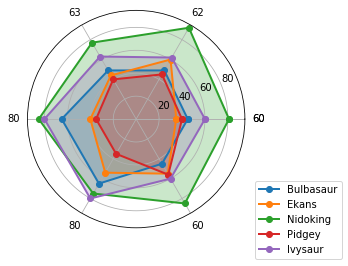

In [41]:
# Stats to retrieve
stats = np.array(['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])

# Record id
ids = [1,43,55,32,3]

# Retrieving the Series from the dataframe
stat_series = poke_stats.loc[ids,stats].values

# Copying the first element to the end
# Just to make the graph prettier
stat_series = np.append(stat_series,stat_series[:,0:1],axis=1)

# Generating the angles for the coordinates. Is one longer than
# the labels to make the graph prettier. Also, notice endpoint parameter usage
angles = np.linspace(0, 2*np.pi, len(stats)+1, endpoint=True)

# Creating the figure
fig=plt.figure()

# Creating a polar subplot to plot on top of it
ax = fig.add_subplot(111, polar=True)

# For each series retrieved, plot a plot 
for id,stats in zip(ids,stat_series):
    ax.plot(angles, stats, 'o-', linewidth=2,label=[poke_stats.loc[id,'Name']][0])
    ax.fill(angles, stats, alpha=0.25)

# Creates the grid
ax.set_thetagrids(angles * 180/np.pi, stats)

# Create the legend
ax.legend(bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
ax.grid(True)

## Transactions

1) How much have I spent on Uber (Include Uber Eats)

In [42]:
transactions = pd.read_excel("./data/transactions.xls")
transactions.head(10)

,Date,Code,Description,Unnamed: 3,Debits,Credits,Balance
0,20/01/2019,CP,GROCERY STORE 1,NaN,1.39,0.00,13.61
1,20/01/2019,CP,GROCERY STORE 1,NaN,3.16,0.00,10.45
2,24/01/2019,CP,LOS PALETEROS,NaN,9.32,0.00,1.13
3,31/01/2019,3O,INTERESES,NaN,0.00,0.08,51.21
4,01/02/2019,CP,SUPER EL PROGRESO,NaN,9.09,0.00,42.12
5,02/02/2019,CP,SODA BUENISIMO,NaN,4.29,0.00,37.83
6,03/02/2019,CP,MAS X MENOS TIBAS DIRECTO,NaN,2.44,0.00,35.39
7,03/02/2019,CP,UBER TRIP BWEE5 HELP.UBER .,NaN,2.98,0.00,32.41
8,03/02/2019,CP,PRF DEBITO NORMAL 474581221635,NaN,6.25,0.00,26.16
9,07/02/2019,AT,RETIRO ATM 353714 HER,NaN,16.47,0.00,759.69


2) Times Uber asked

In [43]:
%%timeit
# Works, but its not the most readable solution
# Notice that this solution is actually more performant than the one below

uber_trans = transactions[list(map(lambda x : x.upper().find('UBER')!= -1,
    transactions['Description'].values))]

4.16 ms ± 340 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%%timeit
# More readable, less performant

uber_trans2 = transactions[transactions['Description'].str.contains('uber',case=False)]

7.48 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
uber_trans2.head(10)

,Date,Code,Description,Unnamed: 3,Debits,Credits,Balance
7,03/02/2019,CP,UBER TRIP BWEE5 HELP.UBER .,NaN,2.98,0.0,32.41
17,10/02/2019,CP,UBER *TRIP HKWQH 800-5,NaN,4.63,0.0,652.21
18,10/02/2019,CP,UBER *TRIP LSWFB 800-5,NaN,4.82,0.0,647.39
21,13/02/2019,CP,UBER *TRIP J6BNH 800-5,NaN,3.22,0.0,623.37
25,18/02/2019,CP,UBER *TRIP TZT3Y 800-5,NaN,5.38,0.0,555.87
27,19/02/2019,CP,UBER *TRIP VBISP 800-5,NaN,1.62,0.0,529.04
33,26/02/2019,CP,UBER *TRIP TK3TX 800-5,NaN,2.35,0.0,491.62
52,09/03/2019,CP,UBER *TRIP X3YO6 800-5,NaN,4.60,0.0,703.08
55,16/03/2019,CP,UBER *TRIP 2NWRV 800-5,NaN,5.28,0.0,670.45
59,19/03/2019,CP,UBER *EATS 800-5,NaN,28.15,0.0,599.51


3) First day & last day of the Uber records

In [53]:
first_day = uber_trans2['Date'].min()
first_day

'01/07/2019'

In [54]:
last_day = uber_trans2['Date'].max()
last_day

'31/08/2019'

4) Number of Uber rides by day

In [60]:
transactions['dateDate'] = pd.to_datetime(transactions['Date'])
day_group = transactions.groupby(pd.Grouper(key='dateDate',freq='D'))['Debits']
day_group.agg(['min','max','count','mean'])

,min,max,count,mean
dateDate,,,,
2019-01-02,9.09,9.09,1,9.090000
2019-01-03,0.62,71.55,2,36.085000
2019-01-04,2.83,145.00,4,44.267500
2019-01-05,3.00,169.49,6,59.136667
2019-01-06,4.64,4.64,1,4.640000
2019-01-07,3.53,10.80,6,6.996667
2019-01-08,0.00,100.00,4,28.870000
2019-01-09,3.00,146.64,5,47.346000
2019-01-10,0.00,650.00,2,325.000000


5) Number of Uber rides by day

6) Most expensive Uber request and date

In [ ]:
# Get the max price
# (Not necesary, just to check the answer)

debit_max = uber_trans['Debits'].max()
debit_max

In [ ]:
# Get the index of the max

index_max = uber_trans['Debits'].idxmax()
index_max

In [ ]:
# Get the row with the index obtained above
# Notice that the index refers to the original dataframe and not to the filtered one

transactions.iloc[260]

In [ ]:
# One-liner

transactions.iloc[uber_trans['Debits'].idxmax()]

## Survey

Read "SVBTESD.xlsx"

In [61]:
svb = pd.read_excel("./data/SVBTESD.xlsx")
svb.head(10)

,Id,SVBTESD_ESAS_TEMP_PIDM,SVBTESD_TERM_CODE,SVBTESD_CRN,SVBTESD_FACULTY_PIDM,SVBTESD_TSSC_CODE,SVBTESD_QCOD_CODE,SVBTESD_SDEF_SEQ_NUM,SVBTESD_SDEF_WEIGHT,SVBTESD_SDEF_TOTAL_SCORE,...,SVBTESD_ACOD_CODE,SVBTESD_PVAC_SEQ_NUM,SVBTESD_PVAC_QPOINTS,SVBTESD_OPEN_ANSWER,SVBTESD_ACTIVITY_DATE,SVBTESD_SURROGATE_ID,SVBTESD_VERSION,SVBTESD_USER_ID,SVBTESD_DATA_ORIGIN,SVBTESD_VPDI_CODE
0,1,1640989,201895,90001,35904,EDD_3RCI,AVE01,5,0.00,0,...,ESCASINO,1,NaN,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
1,2,1640989,201895,90001,35904,EDD_3RCI,AVE02,6,0.00,0,...,SIEM_NUN,1,5.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
2,3,1640989,201895,90001,35904,EDD_3RCI,AVE03,7,0.00,0,...,SIEM_NUN,2,4.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
3,4,1640989,201895,90001,35904,EDD_3RCI,AVE04,8,0.00,0,...,SIEM_NUN,3,3.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
4,5,1640989,201895,90001,35904,EDD_3RCI,AVE05,9,0.00,0,...,SIEM_NUN,1,5.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
5,6,1640989,201895,90001,35904,EDD_3RCI,AVE06,10,0.00,0,...,SIEM_NUN,1,5.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
6,7,1640989,201895,90001,35904,EDD_3RCI,AVE08,11,0.00,0,...,EXE_DEF,2,4.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
7,8,1640989,201895,90001,35904,EDD_3RCI,EGL09,12,3.33,100,...,ESCASINO,1,NaN,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
8,9,1640989,201895,90001,35904,EDD_3RCI,EGL10,13,3.33,100,...,ESCASINO,1,NaN,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN
9,10,1640989,201895,90001,35904,EDD_3RCI,EGL11,14,3.33,100,...,SIEM_NUN,1,5.0,NaN,2019-01-09 19:48:10,NaN,NaN,NaN,NaN,NaN


1) Transpose the surver records by survey ID

In [62]:
svb.transpose()

,0,1,2,3,4,5,6,7,8,9,...,15232,15233,15234,15235,15236,15237,15238,15239,15240,15241
Id,1,2,3,4,5,6,7,8,9,10,...,15233,15234,15235,15236,15237,15238,15239,15240,15241,15242
SVBTESD_ESAS_TEMP_PIDM,1640989,1640989,1640989,1640989,1640989,1640989,1640989,1640989,1640989,1640989,...,1642751,1642751,1642751,1642751,1642751,1642751,1642751,1642751,1642751,1642751
SVBTESD_TERM_CODE,201895,201895,201895,201895,201895,201895,201895,201895,201895,201895,...,201895,201895,201895,201895,201895,201895,201895,201895,201895,201895
SVBTESD_CRN,90001,90001,90001,90001,90001,90001,90001,90001,90001,90001,...,90104,90104,90104,90104,90104,90104,90104,90104,90104,90104
SVBTESD_FACULTY_PIDM,35904,35904,35904,35904,35904,35904,35904,35904,35904,35904,...,119953,119953,119953,119953,119953,119953,119953,119953,119953,119953
SVBTESD_TSSC_CODE,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,...,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI,EDD_3RCI
SVBTESD_QCOD_CODE,AVE01,AVE02,AVE03,AVE04,AVE05,AVE06,AVE08,EGL09,EGL10,EGL11,...,EGL36,GN_IN,IED03,INF01,INF04,INF05,TCI35,TCI36,TCI37,TCI38
SVBTESD_SDEF_SEQ_NUM,5,6,7,8,9,10,11,12,13,14,...,44,1,4,0,2,3,36,37,38,39
SVBTESD_SDEF_WEIGHT,0,0,0,0,0,0,0,3.33,3.33,3.33,...,3.4,0,0,0,0,0,3.33,3.33,3.33,3.33
SVBTESD_SDEF_TOTAL_SCORE,0,0,0,0,0,0,0,100,100,100,...,100,100,0,0,100,0,100,100,100,100


## Dataframe to Json

1) Convert a dataframe to Json with the following schema  
[
{ 
  'colA': 'a', 
  'colB': 'b',
  ...
},
{ 
  'colA': 'a', 
  'colB': 'b',
  ...
},
...
]

In [63]:
svb.sample(2).to_json(orient='records')

'[{"Id":8206,"SVBTESD_ESAS_TEMP_PIDM":1641900,"SVBTESD_TERM_CODE":201895,"SVBTESD_CRN":90048,"SVBTESD_FACULTY_PIDM":129420,"SVBTESD_TSSC_CODE":"EDD_3RCI","SVBTESD_QCOD_CODE":"TCI37","SVBTESD_SDEF_SEQ_NUM":38,"SVBTESD_SDEF_WEIGHT":3.33,"SVBTESD_SDEF_TOTAL_SCORE":100,"SVBTESD_TEQA_CODE":"OPINIONTC","SVBTESD_CALCULATED_POINTS":null,"SVBTESD_ACOD_CODE":"ESCAL-NS","SVBTESD_PVAC_SEQ_NUM":1,"SVBTESD_PVAC_QPOINTS":1.0,"SVBTESD_OPEN_ANSWER":null,"SVBTESD_ACTIVITY_DATE":1547545700000,"SVBTESD_SURROGATE_ID":null,"SVBTESD_VERSION":null,"SVBTESD_USER_ID":null,"SVBTESD_DATA_ORIGIN":null,"SVBTESD_VPDI_CODE":null},{"Id":6471,"SVBTESD_ESAS_TEMP_PIDM":1641674,"SVBTESD_TERM_CODE":201895,"SVBTESD_CRN":90042,"SVBTESD_FACULTY_PIDM":37308,"SVBTESD_TSSC_CODE":"EDD_3RCI","SVBTESD_QCOD_CODE":"GN_IN","SVBTESD_SDEF_SEQ_NUM":1,"SVBTESD_SDEF_WEIGHT":0.0,"SVBTESD_SDEF_TOTAL_SCORE":100,"SVBTESD_TEQA_CODE":"OPINIONTC","SVBTESD_CALCULATED_POINTS":null,"SVBTESD_ACOD_CODE":"GNRO_INC","SVBTESD_PVAC_SEQ_NUM":1,"SVBTESD_PVA